# Imports

In [141]:
import torch
import torch.nn as nn

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm

import sys
from IPython.core.display_functions import clear_output
from IPython.core.ultratb import VerboseTB

In [142]:
VerboseTB._tb_highlight = "bg:#e68cc3"

if "dracula" in plt.style.available:
    plt.style.use("dracula")

# Data preparation

In [143]:
iris = load_iris()

In [144]:
X = torch.tensor(iris.data).to(torch.float32)
y = torch.tensor(iris.target).to(torch.long)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Exploratory Data Analysis (EDA)

In [146]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["class"] = iris.target

In [147]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [148]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Range of values

In [149]:
df["sepal length (cm)"].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal length (cm), dtype: float64

In [150]:
df["sepal width (cm)"].describe()

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal width (cm), dtype: float64

In [151]:
df["petal length (cm)"].describe()

count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal length (cm), dtype: float64

In [152]:
df["petal width (cm)"].describe()

count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal width (cm), dtype: float64

### Visualize data in 2D

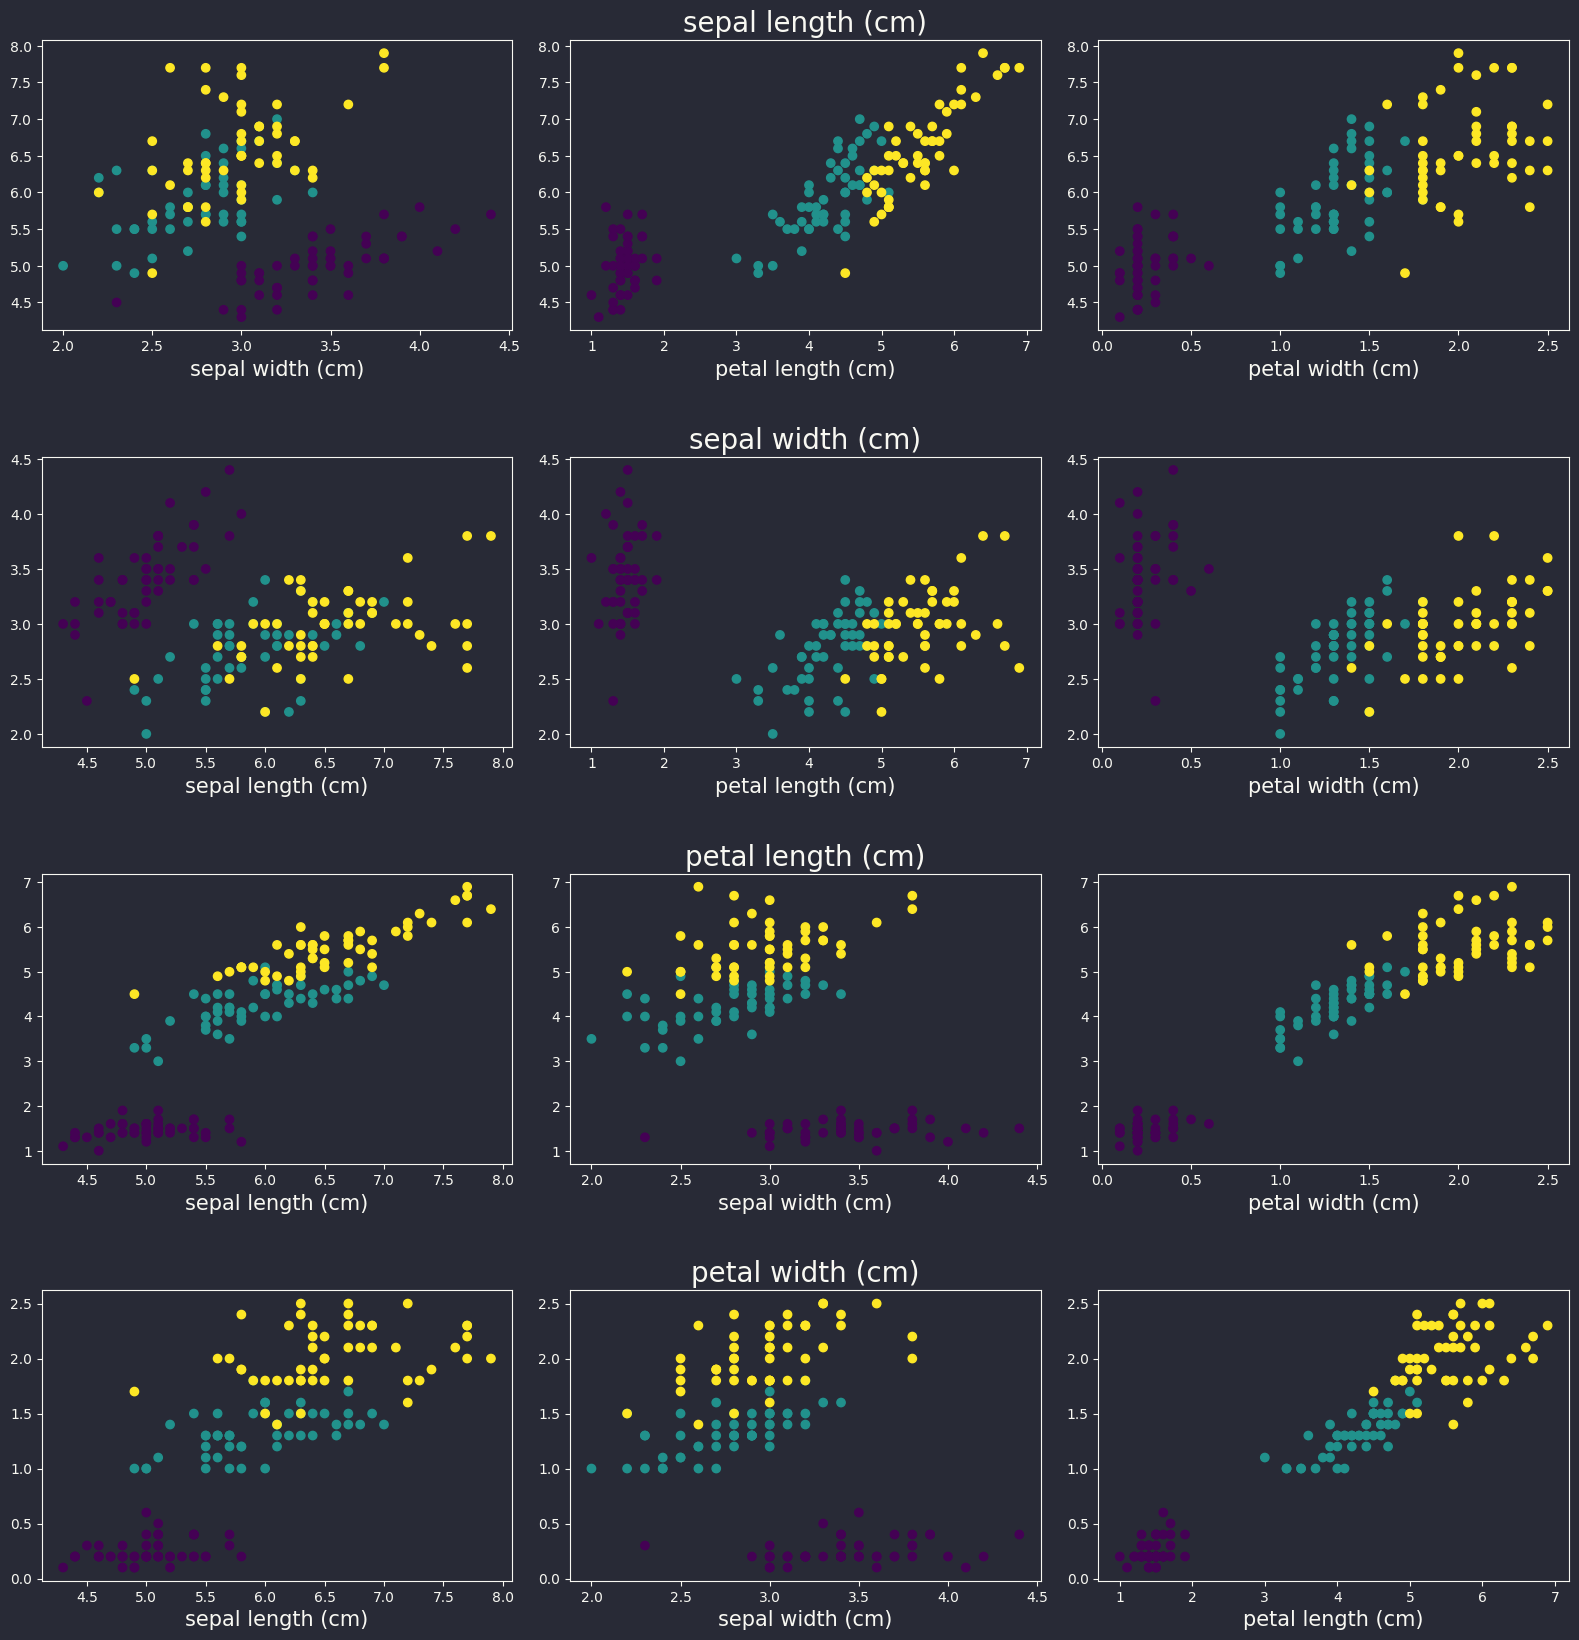

In [153]:
fig, ax = plt.subplots(4, 3, figsize=(16, 16))
fig.tight_layout(h_pad=7)

ax[0, 1].set_title("sepal length (cm)", fontsize=20)
ax[0, 0].scatter(df["sepal width (cm)"].to_numpy(), df["sepal length (cm)"].to_numpy(), c=df["class"].to_numpy())
ax[0, 0].set_xlabel("sepal width (cm)", fontsize=15)
ax[0, 1].scatter(df["petal length (cm)"].to_numpy(), df["sepal length (cm)"].to_numpy(), c=df["class"].to_numpy())
ax[0, 1].set_xlabel("petal length (cm)", fontsize=15)
ax[0, 2].scatter(df["petal width (cm)"].to_numpy(), df["sepal length (cm)"].to_numpy(), c=df["class"].to_numpy())
ax[0, 2].set_xlabel("petal width (cm)", fontsize=15)

ax[1, 1].set_title("sepal width (cm)", fontsize=20)
ax[1, 0].scatter(df["sepal length (cm)"].to_numpy(), df["sepal width (cm)"].to_numpy(), c=df["class"].to_numpy())
ax[1, 0].set_xlabel("sepal length (cm)", fontsize=15)
ax[1, 1].scatter(df["petal length (cm)"].to_numpy(), df["sepal width (cm)"].to_numpy(), c=df["class"].to_numpy())
ax[1, 1].set_xlabel("petal length (cm)", fontsize=15)
ax[1, 2].scatter(df["petal width (cm)"].to_numpy(), df["sepal width (cm)"].to_numpy(), c=df["class"].to_numpy())
ax[1, 2].set_xlabel("petal width (cm)", fontsize=15)

ax[2, 1].set_title("petal length (cm)", fontsize=20)
ax[2, 0].scatter(df["sepal length (cm)"].to_numpy(), df["petal length (cm)"].to_numpy(), c=df["class"].to_numpy())
ax[2, 0].set_xlabel("sepal length (cm)", fontsize=15)
ax[2, 1].scatter(df["sepal width (cm)"].to_numpy(), df["petal length (cm)"].to_numpy(), c=df["class"].to_numpy())
ax[2, 1].set_xlabel("sepal width (cm)", fontsize=15)
ax[2, 2].scatter(df["petal width (cm)"].to_numpy(), df["petal length (cm)"].to_numpy(), c=df["class"].to_numpy())
ax[2, 2].set_xlabel("petal width (cm)", fontsize=15)

ax[3, 1].set_title("petal width (cm)", fontsize=20)
ax[3, 0].scatter(df["sepal length (cm)"].to_numpy(), df["petal width (cm)"].to_numpy(), c=df["class"].to_numpy())
ax[3, 0].set_xlabel("sepal length (cm)", fontsize=15)
ax[3, 1].scatter(df["sepal width (cm)"].to_numpy(), df["petal width (cm)"].to_numpy(), c=df["class"].to_numpy())
ax[3, 1].set_xlabel("sepal width (cm)", fontsize=15)
ax[3, 2].scatter(df["petal length (cm)"].to_numpy(), df["petal width (cm)"].to_numpy(), c=df["class"].to_numpy())
ax[3, 2].set_xlabel("petal length (cm)", fontsize=15)

plt.show()

### Visualize data in 3D

In [154]:
keys = df.keys()

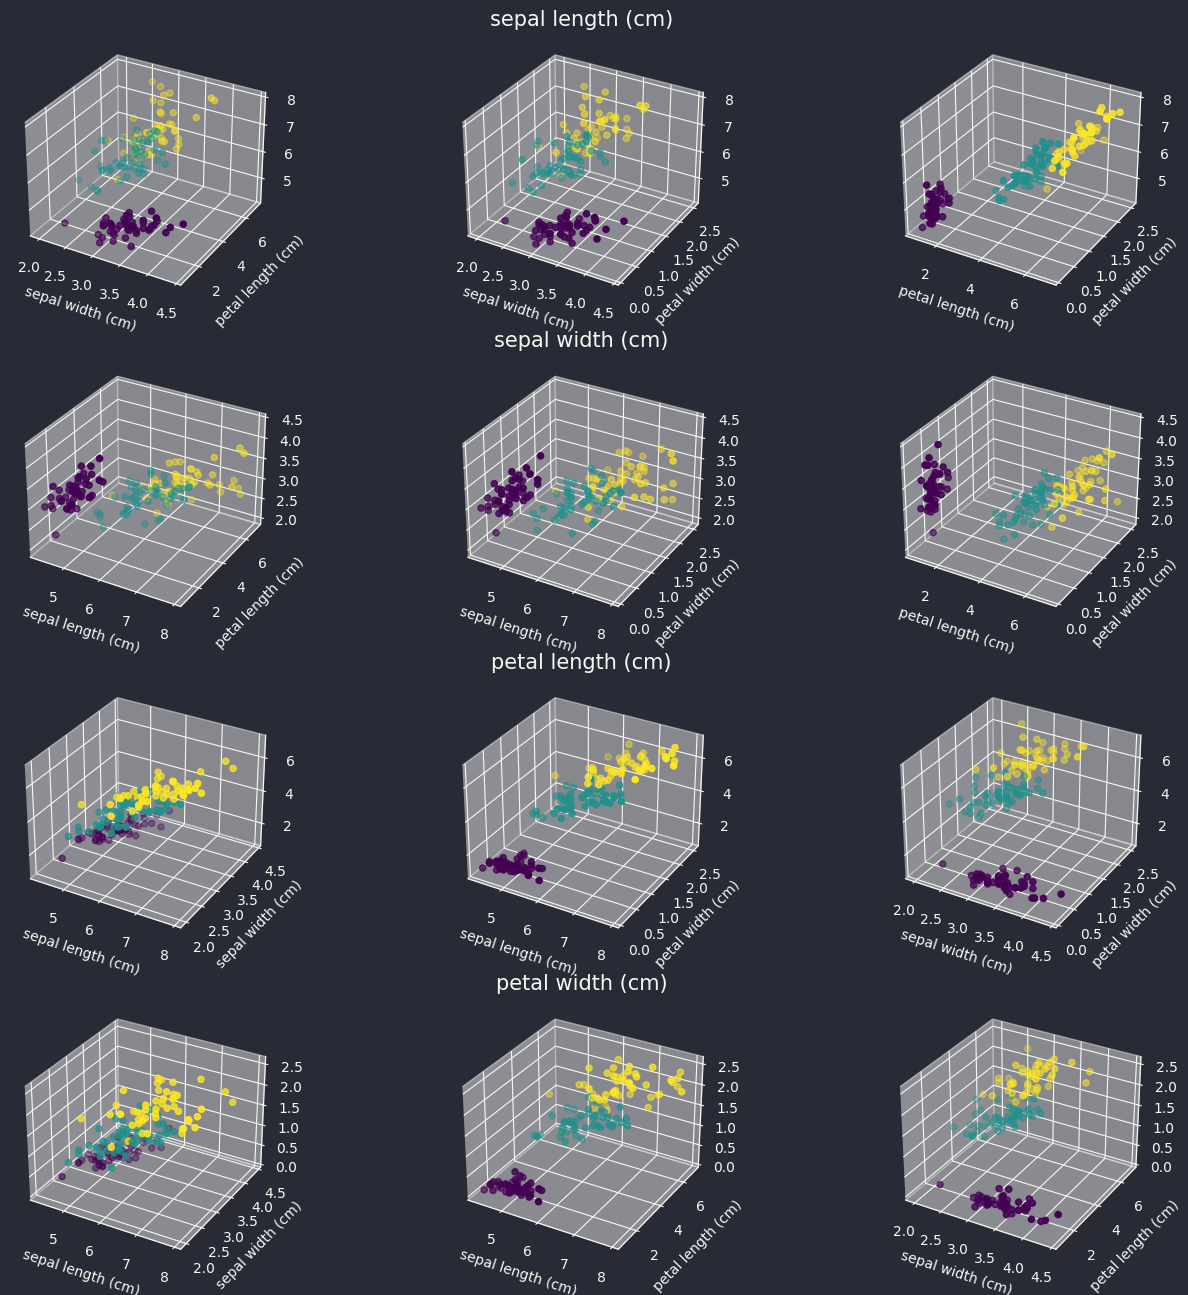

In [155]:
fig = plt.figure(figsize=(16, 16))
ax1 = fig.add_subplot(4, 3, 1, projection='3d')
ax2 = fig.add_subplot(4, 3, 2, projection='3d')
ax3 = fig.add_subplot(4, 3, 3, projection='3d')
ax4 = fig.add_subplot(4, 3, 4, projection='3d')
ax5 = fig.add_subplot(4, 3, 5, projection='3d')
ax6 = fig.add_subplot(4, 3, 6, projection='3d')
ax7 = fig.add_subplot(4, 3, 7, projection='3d')
ax8 = fig.add_subplot(4, 3, 8, projection='3d')
ax9 = fig.add_subplot(4, 3, 9, projection='3d')
ax10 = fig.add_subplot(4, 3, 10, projection='3d')
ax11 = fig.add_subplot(4, 3, 11, projection='3d')
ax12 = fig.add_subplot(4, 3, 12, projection='3d')

ax1.scatter(df[keys[1]], df[keys[2]], df[keys[0]], c=df[keys[4]])
ax1.set_xlabel(keys[1], fontsize=10)
ax1.set_ylabel(keys[2], fontsize=10)
ax2.scatter(df[keys[1]], df[keys[3]], df[keys[0]], c=df[keys[4]])
ax2.set_xlabel(keys[1], fontsize=10)
ax2.set_ylabel(keys[3], fontsize=10)
ax3.scatter(df[keys[2]], df[keys[3]], df[keys[0]], c=df[keys[4]])
ax3.set_xlabel(keys[2], fontsize=10)
ax3.set_ylabel(keys[3], fontsize=10)
ax2.set_title(keys[0], fontsize=15)

ax4.scatter(df[keys[0]], df[keys[2]], df[keys[1]], c=df[keys[4]])
ax4.set_xlabel(keys[0], fontsize=10)
ax4.set_ylabel(keys[2], fontsize=10)
ax5.scatter(df[keys[0]], df[keys[3]], df[keys[1]], c=df[keys[4]])
ax5.set_xlabel(keys[0], fontsize=10)
ax5.set_ylabel(keys[3], fontsize=10)
ax6.scatter(df[keys[2]], df[keys[3]], df[keys[1]], c=df[keys[4]])
ax6.set_xlabel(keys[2], fontsize=10)
ax6.set_ylabel(keys[3], fontsize=10)
ax5.set_title(keys[1], fontsize=15)

ax7.scatter(df[keys[0]], df[keys[1]], df[keys[2]], c=df[keys[4]])
ax7.set_xlabel(keys[0], fontsize=10)
ax7.set_ylabel(keys[1], fontsize=10)
ax8.scatter(df[keys[0]], df[keys[3]], df[keys[2]], c=df[keys[4]])
ax8.set_xlabel(keys[0], fontsize=10)
ax8.set_ylabel(keys[3], fontsize=10)
ax9.scatter(df[keys[1]], df[keys[3]], df[keys[2]], c=df[keys[4]])
ax9.set_xlabel(keys[1], fontsize=10)
ax9.set_ylabel(keys[3], fontsize=10)
ax8.set_title(keys[2], fontsize=15)

ax10.scatter(df[keys[0]], df[keys[1]], df[keys[3]], c=df[keys[4]])
ax10.set_xlabel(keys[0], fontsize=10)
ax10.set_ylabel(keys[1], fontsize=10)
ax11.scatter(df[keys[0]], df[keys[2]], df[keys[3]], c=df[keys[4]])
ax11.set_xlabel(keys[0], fontsize=10)
ax11.set_ylabel(keys[2], fontsize=10)
ax12.scatter(df[keys[1]], df[keys[2]], df[keys[3]], c=df[keys[4]])
ax12.set_xlabel(keys[1], fontsize=10)
ax12.set_ylabel(keys[2], fontsize=10)
ax11.set_title(keys[3], fontsize=15)

plt.show()

# Train func

In [156]:
def train(network, X_train, X_test, y_train, y_test, epochs, learning_rate, plot=True, verbose=True, loss=None):
    loss = loss or nn.NLLLoss()
    optimizer = torch.optim.SGD(params=network.parameters(), lr=learning_rate, momentum=0.9)

    train_loss_epochs = []
    test_loss_epochs = []
    train_accuracy_epochs = []
    test_accuracy_epochs = []

    try:
        for epoch in range(epochs):
            # train
            network.train()
            losses = []
            accuracies = []

            network.zero_grad()
            prediction = network(X_train)
            loss_batch = loss(prediction, y_train)
            loss_batch.backward()
            optimizer.step()

            losses.append(loss_batch.item())
            accuracies.append((np.argmax(prediction.cpu().data.numpy(), 1) == y_train.cpu().data.numpy()).mean())
            train_loss_epochs.append(np.mean(losses))
            train_accuracy_epochs.append(np.mean(accuracies))

            # test
            network.eval()
            losses = []
            accuracies = []

            prediction = network(X_test)
            loss_batch = loss(prediction, y_test)

            losses.append(loss_batch.item())
            accuracies.append((np.argmax(prediction.cpu().data.numpy(), 1) == y_test.cpu().data.numpy()).mean())
            test_loss_epochs.append(np.mean(losses))
            test_accuracy_epochs.append(np.mean(accuracies))

            clear_output(True)
            if verbose:
                sys.stdout.write('\rEpoch {0}... (Train/Test) NLL: {1:.3f}/{2:.3f}\tAccuracy: {3:.3f}/{4:.3f}'.format(
                    epoch, train_loss_epochs[-1], test_loss_epochs[-1],
                    train_accuracy_epochs[-1], test_accuracy_epochs[-1]))
            if plot:
                plt.figure(figsize=(12, 5))
                plt.subplot(1, 2, 1)
                plt.plot(train_loss_epochs, label='Train')
                plt.plot(test_loss_epochs, label='Test')
                plt.xlabel('Epochs', fontsize=16)
                plt.ylabel('Loss', fontsize=16)
                plt.legend(loc=0, fontsize=16)
                plt.grid('on')
                plt.subplot(1, 2, 2)
                plt.plot(train_accuracy_epochs, label='Train accuracy')
                plt.plot(test_accuracy_epochs, label='Test accuracy')
                plt.xlabel('Epochs', fontsize=16)
                plt.ylabel('Accuracy', fontsize=16)
                plt.legend(loc=0, fontsize=16)
                plt.grid('on')
                plt.show()
    except KeyboardInterrupt:
        pass
    return train_loss_epochs, \
        test_loss_epochs, \
        train_accuracy_epochs, \
        test_accuracy_epochs

# Neural network

In [157]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(4, 20),
            nn.Sigmoid(),
            nn.Linear(20, 20),
            nn.Sigmoid(),
            nn.Linear(20, 3),
            nn.LogSoftmax()
        )

    def forward(self, X):
        probs = self.layers(X)
        return probs

In [158]:
network = Classifier()

Epoch 499... (Train/Test) NLL: 0.463/0.393	Accuracy: 0.975/1.000

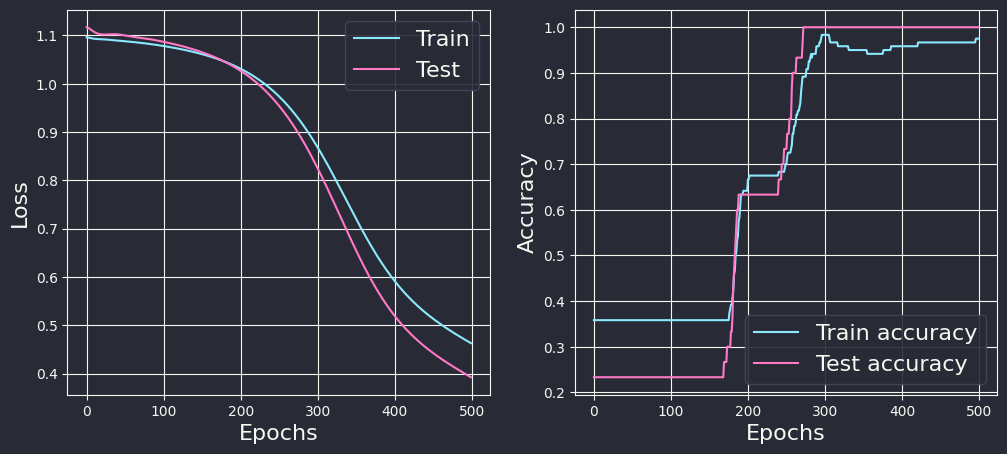

In [159]:
train_loss, test_loss, train_accuracy, test_accuracy = train(network, X_train, X_test, y_train, y_test, epochs=500, learning_rate=0.01)

# Performance comparison

In this section quality of learning is not the goal. So it's not important to measure accuracy and loss. It's worth concentrating on computing time.

- CUDA: NVidia GeForce RTX 2080Ti 11Gb
- MPS: M2 Max 64Gb

## Preparation

### Devices

In [160]:
cpu_device = torch.device("cpu")
if torch.cuda.is_available():
    gpu_device = torch.device("cuda")
elif torch.has_mps:
    gpu_device = torch.device("mps")

### Function for evaluation

In [58]:
def evaluate_performance(network, X, y, epochs=100, learning_rate=0.01, plot=True, verbose=True, loss=None):
    loss = loss or nn.NLLLoss()
    optimizer = torch.optim.SGD(params=network.parameters(), lr=learning_rate, momentum=0.9)

    for epoch in tqdm(range(epochs)):
        network.train()

        network.zero_grad()
        prediction = network(X)
        loss_batch = loss(prediction, y)
        loss_batch.backward()
        optimizer.step()

## Experiment 1

### Windows

#### CPU

In [59]:
net = Classifier()
net.to(device=cpu_device)

Classifier(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=20, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=20, out_features=3, bias=True)
    (5): LogSoftmax(dim=None)
  )
)

In [61]:
%%time
evaluate_performance(net, X, y)

  0%|          | 0/100 [00:00<?, ?it/s]C:\Python311\Lib\site-packages\torch\nn\modules\container.py:217: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
100%|██████████| 100/100 [00:00<00:00, 1492.53it/s]

CPU times: total: 266 ms
Wall time: 69 ms


#### CUDA

In [62]:
net.to(device=gpu_device)

Classifier(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=20, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=20, out_features=3, bias=True)
    (5): LogSoftmax(dim=None)
  )
)

In [63]:
X_gpu = X.clone().detach().to(device=gpu_device)
y_gpu = y.clone().detach().to(device=gpu_device)

In [64]:
%%time
evaluate_performance(net, X_gpu, y_gpu)

  0%|          | 0/100 [00:00<?, ?it/s]C:\Python311\Lib\site-packages\torch\nn\modules\container.py:217: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
100%|██████████| 100/100 [00:00<00:00, 879.92it/s]

CPU times: total: 0 ns
Wall time: 116 ms


#### Results

- After switching from CPU to CUDA:
    1. CPU times decreased to 0 ns after switching from CPU to CUDA;
    2. Wall time has increased;

### Mac

#### CPU

In [110]:
net = Classifier()
net.to(device=cpu_device)

Classifier(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=20, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=20, out_features=3, bias=True)
    (5): LogSoftmax(dim=None)
  )
)

In [111]:
%%time
evaluate_performance(net, X, y)

100%|██████████| 100/100 [00:00<00:00, 3312.91it/s]

CPU times: user 27.4 ms, sys: 26.4 ms, total: 53.7 ms
Wall time: 31.5 ms


#### MPS

In [112]:
net.to(device=gpu_device)

Classifier(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=20, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=20, out_features=3, bias=True)
    (5): LogSoftmax(dim=None)
  )
)

In [113]:
X_gpu = X.clone().detach().to(device=gpu_device)
y_gpu = y.clone().detach().to(device=gpu_device)

In [114]:
%%time
evaluate_performance(net, X_gpu, y_gpu)

100%|██████████| 100/100 [00:00<00:00, 747.70it/s]

CPU times: user 134 ms, sys: 14.7 ms, total: 149 ms
Wall time: 135 ms


#### Results

- After switching from CPU to MPS:
    1. CPU times increased;
    2. Wall time increased;

## Experiment 2

Let's use classifier network with more complex architecture to try to see the difference in performace.

In [65]:
class ComplexClassifier(nn.Module):
    def __init__(self):
        super(ComplexClassifier, self).__init__()

        self.layers = nn.Sequential(
            nn.Linear(4, 256),
            nn.Sigmoid(),
            nn.Linear(256, 128),
            nn.Sigmoid(),
            nn.Linear(128, 64),
            nn.Sigmoid(),
            nn.Linear(64, 32),
            nn.Sigmoid(),
            nn.Linear(32, 3),
            nn.LogSoftmax()
        )

    def forward(self, input):
        output = self.layers(input)

        return output

### Windows

#### CPU

In [66]:
complex_cls = ComplexClassifier()
complex_cls.to(device=cpu_device)

ComplexClassifier(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=256, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): Sigmoid()
    (8): Linear(in_features=32, out_features=3, bias=True)
    (9): LogSoftmax(dim=None)
  )
)

In [67]:
%%time
evaluate_performance(complex_cls, X, y, epochs=100)

  0%|          | 0/100 [00:00<?, ?it/s]C:\Python311\Lib\site-packages\torch\nn\modules\container.py:217: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
100%|██████████| 100/100 [00:00<00:00, 483.97it/s]

CPU times: total: 922 ms
Wall time: 209 ms


#### CUDA

In [68]:
complex_cls.to(device=gpu_device)

ComplexClassifier(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=256, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): Sigmoid()
    (8): Linear(in_features=32, out_features=3, bias=True)
    (9): LogSoftmax(dim=None)
  )
)

In [69]:
%%time
evaluate_performance(complex_cls, X_gpu, y_gpu)

  0%|          | 0/100 [00:00<?, ?it/s]C:\Python311\Lib\site-packages\torch\nn\modules\container.py:217: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
100%|██████████| 100/100 [00:00<00:00, 583.22it/s]

CPU times: total: 31.2 ms
Wall time: 172 ms


#### Results

- Wall time is almost the same;
- There's a significant improvement in CPU times when switching from CPU to CUDA device;

### Mac

#### CPU

In [116]:
complex_cls = ComplexClassifier()
complex_cls.to(device=cpu_device)

ComplexClassifier(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=256, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): Sigmoid()
    (8): Linear(in_features=32, out_features=3, bias=True)
    (9): LogSoftmax(dim=None)
  )
)

In [117]:
%%time
evaluate_performance(complex_cls, X, y, epochs=100)

100%|██████████| 100/100 [00:00<00:00, 971.29it/s]

CPU times: user 75.3 ms, sys: 57.6 ms, total: 133 ms
Wall time: 104 ms


#### MPS

In [119]:
complex_cls.to(device=gpu_device)

ComplexClassifier(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=256, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): Sigmoid()
    (8): Linear(in_features=32, out_features=3, bias=True)
    (9): LogSoftmax(dim=None)
  )
)

In [120]:
%%time
evaluate_performance(complex_cls, X_gpu, y_gpu)

100%|██████████| 100/100 [00:00<00:00, 461.66it/s]

CPU times: user 217 ms, sys: 21.8 ms, total: 239 ms
Wall time: 218 ms


#### Results

- Wall time has increased twice;
- CPU times increased twice;

## Experiment 3

Let's try to work with bigger amounts of data by creating some synthetic dataset.

### Synthetic data generation

In [79]:
sample_count = 100000
X_syn = torch.tensor(np.random.randn(sample_count, 4)).to(torch.float32)
y_syn = torch.tensor(np.random.randint(0, 3, size=sample_count)).to(torch.long)

In [80]:
complex_cls = ComplexClassifier()

### Windows

#### CPU

In [81]:
complex_cls.to(device=cpu_device)

ComplexClassifier(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=256, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): Sigmoid()
    (8): Linear(in_features=32, out_features=3, bias=True)
    (9): LogSoftmax(dim=None)
  )
)

In [82]:
%%time
evaluate_performance(complex_cls, X_syn, y_syn, epochs=100)

  0%|          | 0/100 [00:00<?, ?it/s]C:\Python311\Lib\site-packages\torch\nn\modules\container.py:217: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
100%|██████████| 100/100 [00:23<00:00,  4.19it/s]

CPU times: total: 2min 35s
Wall time: 23.9 s


#### CUDA

In [83]:
complex_cls.to(device=gpu_device)

ComplexClassifier(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=256, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): Sigmoid()
    (8): Linear(in_features=32, out_features=3, bias=True)
    (9): LogSoftmax(dim=None)
  )
)

In [84]:
X_syn_gpu = X_syn.clone().detach().to(device=gpu_device)
y_syn_gpu = y_syn.clone().detach().to(device=gpu_device)

In [89]:
%%time
evaluate_performance(complex_cls, X_syn_gpu, y_syn_gpu, epochs=100)

  0%|          | 0/100 [00:00<?, ?it/s]C:\Python311\Lib\site-packages\torch\nn\modules\container.py:217: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
100%|██████████| 100/100 [00:01<00:00, 97.11it/s]

CPU times: total: 15.6 ms
Wall time: 1.03 s


#### Results

- Significant improvement in computing time both in CPU times and Wall time when switching from CPU to CUDA;

### Mac

#### CPU

In [121]:
complex_cls.to(device=cpu_device)

ComplexClassifier(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=256, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): Sigmoid()
    (8): Linear(in_features=32, out_features=3, bias=True)
    (9): LogSoftmax(dim=None)
  )
)

In [122]:
%%time
evaluate_performance(complex_cls, X_syn, y_syn, epochs=100)

100%|██████████| 100/100 [01:41<00:00,  1.02s/it]

CPU times: user 5min 43s, sys: 2min, total: 7min 43s
Wall time: 1min 41s


#### MPS

In [123]:
complex_cls.to(device=gpu_device)

ComplexClassifier(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=256, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): Sigmoid()
    (8): Linear(in_features=32, out_features=3, bias=True)
    (9): LogSoftmax(dim=None)
  )
)

In [124]:
X_syn_gpu = X_syn.clone().detach().to(device=gpu_device)
y_syn_gpu = y_syn.clone().detach().to(device=gpu_device)

In [125]:
%%time
evaluate_performance(complex_cls, X_syn_gpu, y_syn_gpu, epochs=100)

100%|██████████| 100/100 [00:25<00:00,  3.96it/s]

CPU times: user 3.19 s, sys: 417 ms, total: 3.61 s
Wall time: 25.3 s


#### Results

- Significant improvement in computing time both in CPU times and Wall time when switching from CPU to MPS;

## Experiment 4

If something else is done besides neural network training, performance might not significantly improve after changing device from CPU to CUDA (Compute Unified Device Architecture) or MPS (Metal Performance Shader)

### Experiment 4.1

#### Complex function to evaluate performance

In [98]:
def complex_evaluation_1(network, X, y, epochs=100, learning_rate=0.01, plot=True, verbose=True, loss=None):
    loss = loss or nn.NLLLoss()
    optimizer = torch.optim.SGD(params=network.parameters(), lr=learning_rate, momentum=0.9)

    train_loss_epochs = []
    train_accuracy_epochs = []

    try:
        for epoch in tqdm(range(epochs)):
            network.train()
            losses = []
            accuracies = []

            network.zero_grad()
            prediction = network(X)
            loss_batch = loss(prediction, y)
            loss_batch.backward()
            optimizer.step()

            losses.append(loss_batch.item())
            accuracies.append((np.argmax(prediction.cpu().data.numpy(), 1) == y.cpu().data.numpy()).mean())
            train_loss_epochs.append(np.mean(losses))
            train_accuracy_epochs.append(np.mean(accuracies))


            clear_output(True)
            if verbose:
                sys.stdout.write('\rEpoch {0}... (Train) NLL: {1:.3f}\Accuracy: {2:.3f}'.format(
                    epoch, train_loss_epochs[-1], train_accuracy_epochs[-1]
                ))
            if plot:
                plt.figure(figsize=(12, 5))
                plt.subplot(1, 2, 1)
                plt.plot(train_loss_epochs, label='Train')
                plt.xlabel('Epochs', fontsize=16)
                plt.ylabel('Loss', fontsize=16)
                plt.legend(loc=0, fontsize=16)
                plt.grid('on')
                plt.subplot(1, 2, 2)
                plt.plot(train_accuracy_epochs, label='Train accuracy')
                plt.xlabel('Epochs', fontsize=16)
                plt.ylabel('Accuracy', fontsize=16)
                plt.legend(loc=0, fontsize=16)
                plt.grid('on')
                plt.show()
    except KeyboardInterrupt:
        pass

#### Windows

##### CPU

In [105]:
complex_cls.to(device=cpu_device)

ComplexClassifier(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=256, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): Sigmoid()
    (8): Linear(in_features=32, out_features=3, bias=True)
    (9): LogSoftmax(dim=None)
  )
)

Epoch 99... (Train) NLL: 1.098\Accuracy: 0.667

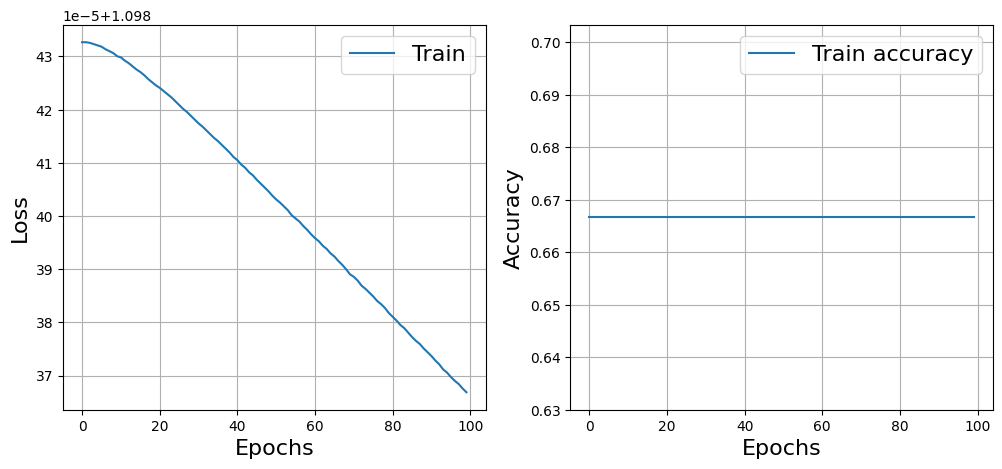

100%|██████████| 100/100 [00:23<00:00,  4.32it/s]

CPU times: total: 1min 54s
Wall time: 23.2 s


In [106]:
%%time
complex_evaluation_1(complex_cls, X, y)

##### CUDA

In [101]:
complex_cls.to(device=gpu_device)

ComplexClassifier(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=256, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): Sigmoid()
    (8): Linear(in_features=32, out_features=3, bias=True)
    (9): LogSoftmax(dim=None)
  )
)

Epoch 99... (Train) NLL: 1.098\Accuracy: 0.667

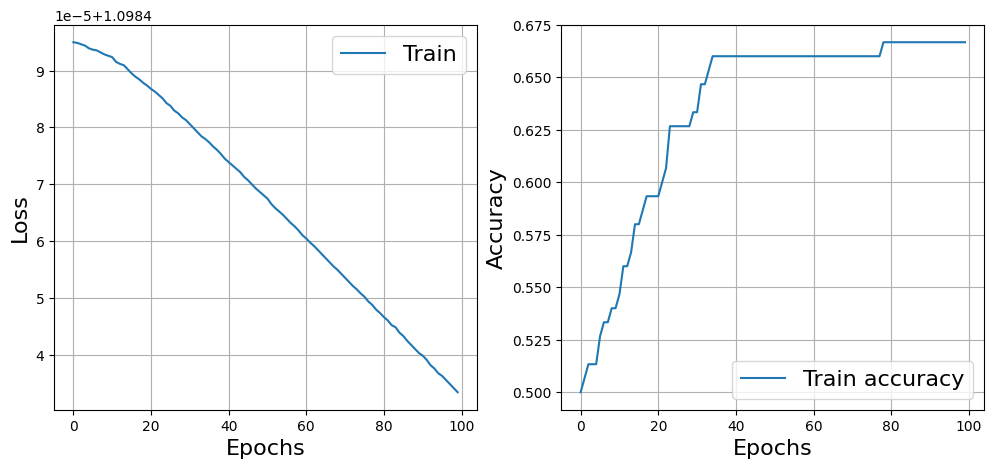

100%|██████████| 100/100 [00:21<00:00,  4.59it/s]

CPU times: total: 17.9 s
Wall time: 21.8 s


In [104]:
%%time
complex_evaluation_1(complex_cls, X_gpu, y_gpu)

##### Results

- CPU times is less in CUDA than in CPU;
- Wall time is almost the same;

#### Mac

##### CPU

In [126]:
complex_cls.to(device=cpu_device)

ComplexClassifier(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=256, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): Sigmoid()
    (8): Linear(in_features=32, out_features=3, bias=True)
    (9): LogSoftmax(dim=None)
  )
)

Epoch 99... (Train) NLL: 1.098\Accuracy: 0.667

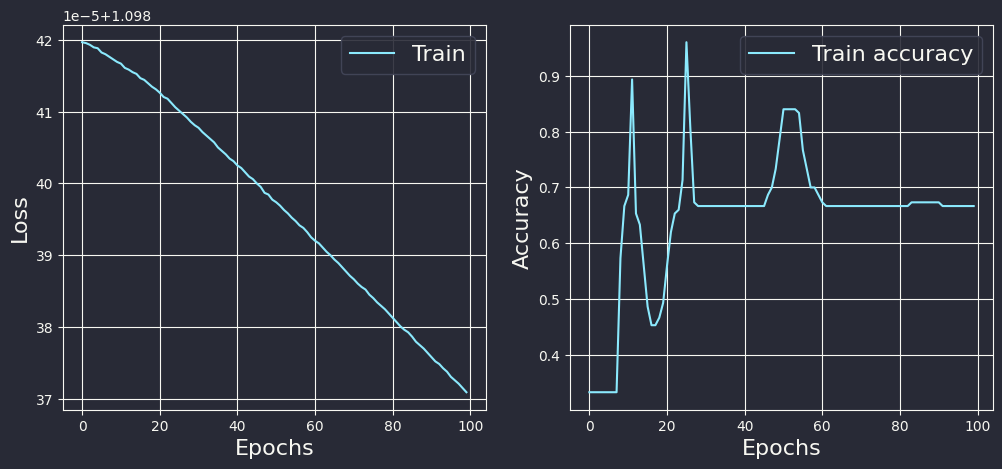

100%|██████████| 100/100 [00:11<00:00,  8.60it/s]

CPU times: user 34.2 s, sys: 824 ms, total: 35 s
Wall time: 11.6 s


In [127]:
%%time
complex_evaluation_1(complex_cls, X, y)

##### MPS

In [128]:
complex_cls.to(device=gpu_device)

ComplexClassifier(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=256, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): Sigmoid()
    (8): Linear(in_features=32, out_features=3, bias=True)
    (9): LogSoftmax(dim=None)
  )
)

Epoch 99... (Train) NLL: 1.098\Accuracy: 0.667

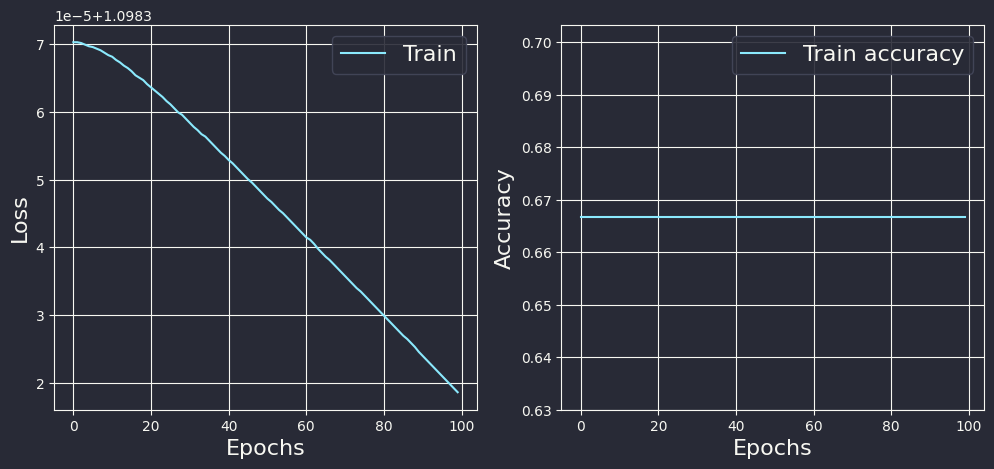

100%|██████████| 100/100 [00:11<00:00,  8.44it/s]

CPU times: user 34.7 s, sys: 802 ms, total: 35.5 s
Wall time: 11.9 s


In [129]:
%%time
complex_evaluation_1(complex_cls, X_gpu, y_gpu)

##### Results

- Results are almost the same with CPU and MPS;

### Experiment 4.2

Let's try to use complex function without plotting accuracies and losses;

#### Complex function

In [108]:
def complex_evaluation_2(network, X, y, epochs=100, learning_rate=0.01, plot=True, verbose=True, loss=None):
    loss = loss or nn.NLLLoss()
    optimizer = torch.optim.SGD(params=network.parameters(), lr=learning_rate, momentum=0.9)

    train_loss_epochs = []
    train_accuracy_epochs = []

    try:
        for epoch in tqdm(range(epochs)):
            network.train()
            losses = []
            accuracies = []

            network.zero_grad()
            prediction = network(X)
            loss_batch = loss(prediction, y)
            loss_batch.backward()
            optimizer.step()

            losses.append(loss_batch.item())
            accuracies.append((np.argmax(prediction.cpu().data.numpy(), 1) == y.cpu().data.numpy()).mean())
            train_loss_epochs.append(np.mean(losses))
            train_accuracy_epochs.append(np.mean(accuracies))
    except KeyboardInterrupt:
        pass

#### Windows

##### CPU

In [114]:
complex_cls.to(device=cpu_device)

ComplexClassifier(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=256, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): Sigmoid()
    (8): Linear(in_features=32, out_features=3, bias=True)
    (9): LogSoftmax(dim=None)
  )
)

In [115]:
%%time
complex_evaluation_2(complex_cls, X_syn, y_syn)

  0%|          | 0/100 [00:00<?, ?it/s]C:\Python311\Lib\site-packages\torch\nn\modules\container.py:217: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
100%|██████████| 100/100 [00:24<00:00,  4.12it/s]

CPU times: total: 2min 36s
Wall time: 24.3 s


##### CUDA

In [116]:
complex_cls.to(device=gpu_device)

ComplexClassifier(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=256, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): Sigmoid()
    (8): Linear(in_features=32, out_features=3, bias=True)
    (9): LogSoftmax(dim=None)
  )
)

In [117]:
%%time
complex_evaluation_2(complex_cls, X_syn_gpu, y_syn_gpu)

  0%|          | 0/100 [00:00<?, ?it/s]C:\Python311\Lib\site-packages\torch\nn\modules\container.py:217: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
100%|██████████| 100/100 [00:01<00:00, 69.45it/s]

CPU times: total: 1.3 s
Wall time: 1.44 s


##### Results

- It seems that plotting is done on CPU and is a complex computing operation, which takes a lot of time;
- After removing plotting from complex function there's a signigicant improvement in performance;

#### Mac

- M2 Max seems to be much faster than RTX 2080 Ti, so let's give a bigger dataset to evaluate its performance;

In [135]:
sample_count = 1000000
X_syn = torch.tensor(np.random.randn(sample_count, 4)).to(torch.float32)
y_syn = torch.tensor(np.random.randint(0, 3, size=sample_count)).to(torch.long)

##### CPU

In [137]:
complex_cls.to(device=cpu_device)

ComplexClassifier(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=256, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): Sigmoid()
    (8): Linear(in_features=32, out_features=3, bias=True)
    (9): LogSoftmax(dim=None)
  )
)

In [138]:
%%time
complex_evaluation_2(complex_cls, X_syn, y_syn)

100%|██████████| 100/100 [01:40<00:00,  1.00s/it]

CPU times: user 5min 41s, sys: 1min 57s, total: 7min 39s
Wall time: 1min 40s


##### MPS

In [139]:
complex_cls.to(device=gpu_device)

ComplexClassifier(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=256, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): Sigmoid()
    (8): Linear(in_features=32, out_features=3, bias=True)
    (9): LogSoftmax(dim=None)
  )
)

In [140]:
%%time
complex_evaluation_2(complex_cls, X_syn_gpu, y_syn_gpu)

100%|██████████| 100/100 [00:28<00:00,  3.53it/s]

CPU times: user 3.52 s, sys: 853 ms, total: 4.37 s
Wall time: 28.3 s


##### Results

- After switching from CPU to MPS:
    1. Wall time decreased in three times;
    2. CPU times: dramatic improvement from almost 8 min to 4 sec;

# Animation

Uncomment this section, if you want to see the process of learning by epoch.

In [ ]:
# def get_preds(net, X, y, epochs, learning_rate):
#     loss = nn.NLLLoss()
#     optimizer = torch.optim.SGD(params=net.parameters(), lr=learning_rate, momentum=0.9)
#     predictions = []
#
#     for epoch in range(epochs):
#         net.train()
#         net.zero_grad()
#         prediction = net(X)
#         predictions.append(prediction)
#         loss_batch = loss(prediction, y)
#         loss_batch.backward()
#         optimizer.step()
#     return predictions

In [ ]:
# classifier = Classifier()
# epoch_max = 100
#
# X = torch.tensor(iris.data).to(torch.float32)
# y = torch.tensor(iris.target).to(torch.long)
# predictions = get_preds(classifier, X, y, epoch_max, learning_rate=0.01)

In [ ]:
# plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams["animation.embed_limit"] = "100"

In [ ]:
# fig = plt.figure(figsize=(9,9))
# ax1 = fig.add_subplot(1, 2, 1, projection="3d")
# ax2 = fig.add_subplot(1, 2, 2, projection="3d")
#
# def update(i):
#     fig.suptitle(i)
#     ax1.cla()
#     ax1.scatter(df[keys[0]], df[keys[3]], df[keys[2]], c=df[keys[4]])
#     ax1.set_title("ground truth")
#
#     ax2.cla()
#     ax2.scatter(df[keys[0]], df[keys[3]], df[keys[2]], c=np.argmax(predictions[i].data.numpy(), axis=1))
#     ax2.set_title("prediction")
#
#
# animation.FuncAnimation(fig, update, interval=100, frames=range(epoch_max))